# WEEK4_NLP_Tweets_Disaster_Kaggle_Mini_Project
## Kavitha Sundaram

NLP Natural language processing:
NLP is now one of fastest growing field and several companies are invested in this for acquiring valuable insights.
NLP is a powerful method that influences the behavior of the brain using language, among other forms of communication to allow one person to ‘re-code’ the brain’s response to stimuli (or its programming).
In todays article we are going to discuss about the analysis and creation of a disaster tweet classification 
with kaggle mini dataset. Lets have grand look at datasets description.


In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import os

# Plots
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageDraw
import seaborn as sns
import re
# Data processing, metrics and modeling
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import tensorflow as tf
#data cleaning
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#data modeling
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM, GRU,Dense,Dropout
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import time

from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import PReLU
from keras.initializers import Constant
from tensorflow.keras.models import Sequential


import warnings
warnings.filterwarnings('ignore')
# Prints the current working directory
os.getcwd()
#changing my working directory as per project folder BBC files.
%cd "/Users/kavithasundaram/Documents/SKavitha/spring march-may 2023/DTSA-5511/week4/nlp-getting-started"


/Users/kavithasundaram/Documents/SKavitha/spring march-may 2023/DTSA-5511/week4/nlp-getting-started


In [2]:
#list of datafiles from kaggle dataset
os.listdir("./")

['nlptweet.csv', 'test.csv', 'train.csv', 'sample_submission.csv']

## Checking training and testing samples:

In [3]:
# Load in cnn data 
nlp_train = pd.read_csv("./train.csv")
nlp_test = pd.read_csv("./test.csv")
display(nlp_train.info(),nlp_train.head(),nlp_train.describe())
display(nlp_test.info(),nlp_test.head(),nlp_test.describe())
submission_nlp = pd.read_csv("./sample_submission.csv")
submission_nlp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


None

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


None

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


,id
count,3263.000000
mean,5427.152927
std,3146.427221
min,0.000000
25%,2683.000000
50%,5500.000000
75%,8176.000000
max,10875.000000


,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [4]:
#Random subset of rows
from random import sample
rows = sample([i for i in range(7613)], 5)
nlp_train.iloc[rows, :]

,id,keyword,location,text,target
459,662,attack,Seattle WA,BREAKING: Obama Officials GAVE Muslim Terroris...,1
6198,8846,smoke,Rio de Janeiro,smoke whatever you got,0
4855,6914,mass%20murderer,NaN,@defendbutera i look like a mass murderer in it,0
7051,10102,typhoon,NaN,Please recover from the Typhoon. ????,1
4490,6386,hurricane,#BlackLivesMatter,@zaynmaIikist listen to hurricane,1


## 1. Brief description of the problem and data (5 pts) 
Briefly describe the challenge problem and NLP. Describe the size, dimension, structure, etc., of the data. 

|        SUMMARY of DATASET | **NLP Tweets dataset** | 
|-------------------------------------------- |---------|
| It has 5 columns(id,keyword,location,text,target)    | It has 4 columns (Id,text,keyword,location)
| Training sample count = 7613                         | Testing sample count = 3263  | 
| Size = 297 KB                                        | Size = 102 KB  | 
| NLP Tweets has 3 files(Train,Test and Submission.csv) 

## Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data (15 pts)

## 1. Data Analysis(Checking Null Values)-Train and Test Datasets

In [5]:
nlp_train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
nlp_test.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

Text(0.5, 1.0, 'Target Distributions \n (0: Non Disaster || 1: Disaster)')

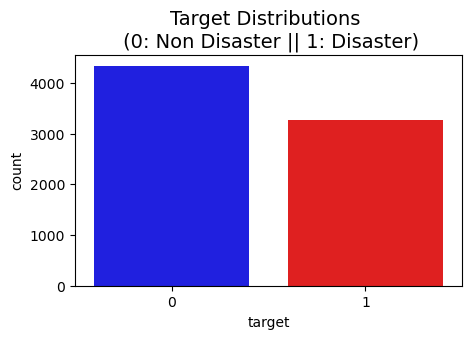

In [7]:
#citation:kaggle nlp disaster tweets.
plt.figure(figsize=(5,3))
colors = ["blue", "red"]

sns.countplot(x = 'target', data=nlp_train, palette=colors)
plt.title('Target Distributions \n (0: Non Disaster || 1: Disaster)', fontsize=14)

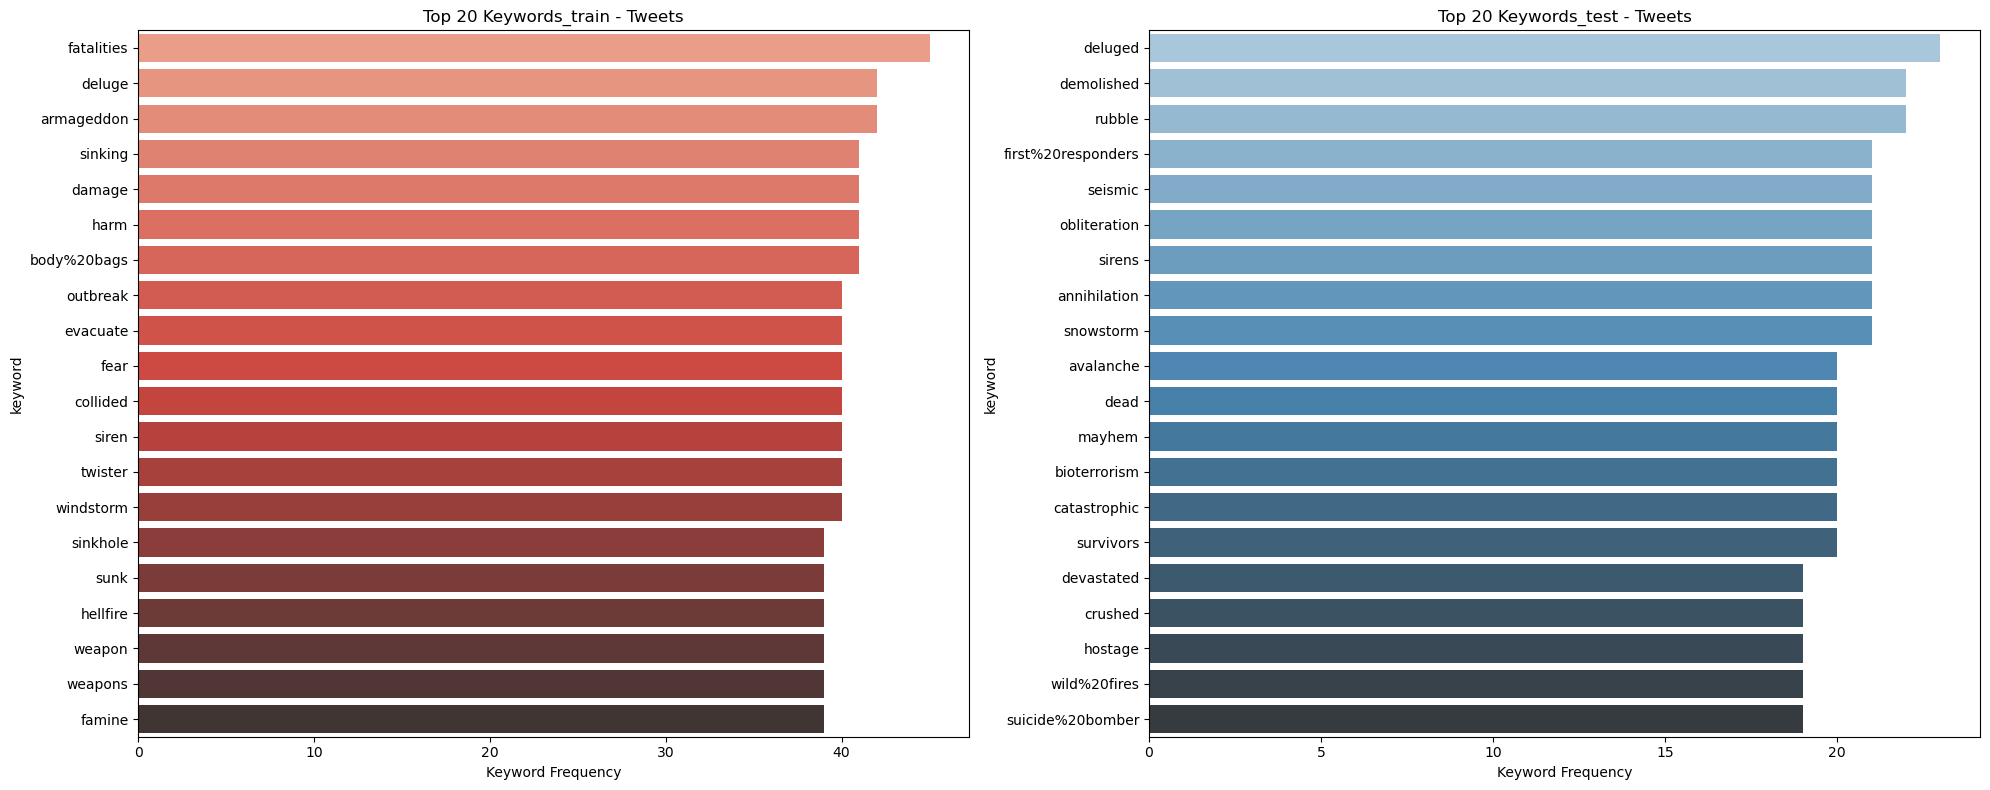

In [8]:
#Counting keywords tweets.
train20_tweets = nlp_train['keyword'].value_counts()
test20_tweets = nlp_test['keyword'].value_counts()
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot(y=train20_tweets[0:20].index, x=train20_tweets[0:20], orient='h', ax=ax[0], palette="Reds_d")
ax[0].set_title("Top 20 Keywords_train - Tweets")
ax[0].set_xlabel("Keyword Frequency")
sns.barplot(y=test20_tweets[0:20].index, x=test20_tweets[0:20], orient='h', ax=ax[1], palette="Blues_d")
ax[1].set_title("Top 20 Keywords_test - Tweets")
ax[1].set_xlabel("Keyword Frequency")
plt.tight_layout()
plt.show()

Most used keyword in both training and testing dataset was 'DELUGE'. Most are disaster words during emergency circumstances like ('harm','damage') in training dataset and ('seismic','dead') in testing datasets.Both has more 
disaster words than non-disaster words like('blazing','ruin').etc..,


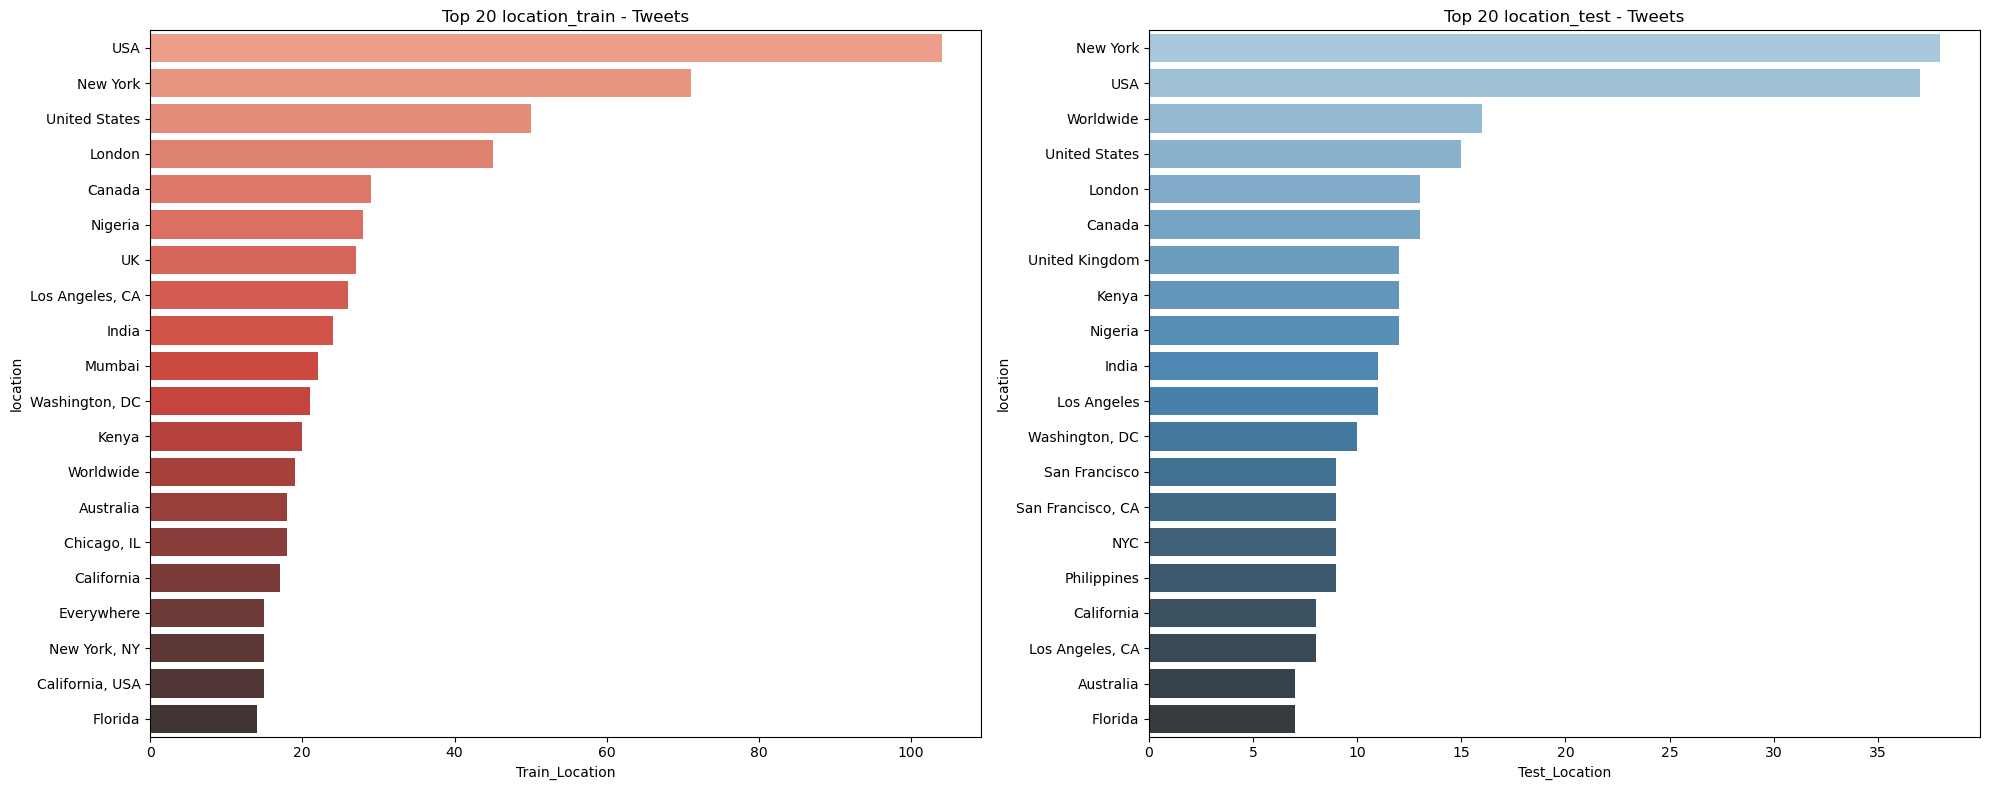

In [9]:
train20_loc = nlp_train["location"].value_counts()
test20_loc = nlp_test["location"].value_counts()
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot(y=train20_loc[0:20].index, x=train20_loc[0:20], orient='h', ax=ax[0], palette="Reds_d")
ax[0].set_title("Top 20 location_train - Tweets")
ax[0].set_xlabel("Train_Location")
sns.barplot(y=test20_loc[0:20].index, x=test20_loc[0:20], orient='h', ax=ax[1], palette="Blues_d")
ax[1].set_title("Top 20 location_test - Tweets")
ax[1].set_xlabel("Test_Location")
plt.tight_layout()
plt.show()

Both has top locations of USA and Newyork. whereas, florida is the least effected disastertweets in USA.Other countries are middleway like london,india.Lets have a look at model architecture to fine tune hyperparameters using LSTM and other models.

## Data Preprocessing and cleaning:

In [10]:
#Data cleaning:
#citation:https://www.kaggle.com/code/ragnisah/text-data-cleaning-tweets-analysis
def data_cleaning(tweet):
    # remove punctuations
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # remove numbers
    tweet = re.sub(r'[0-9]', '', tweet)
    #to lowercase
    tweet = tweet.lower()
    # Stop word removal
    lemma = WordNetLemmatizer()
    tweet = " ".join(word for word in word_tokenize(tweet) if word not in stopwords.words('english'))
    # removing html tags
    tweet = re.sub(r"&.*?;|<.*?>", " ", tweet)
    # url removal
    tweet = re.sub(r"https?://\S+|www\.\S+", " ", tweet)
    # non word removals (special chars)
    tweet = re.sub(r"[^a-z]", " ", tweet)
    # lemmatization
    tweet = " ".join(lemma.lemmatize(word) for word in word_tokenize(tweet))
    # Single char removal
    tweet = re.sub(r"\b\w\b", "", tweet).strip()
    return tweet

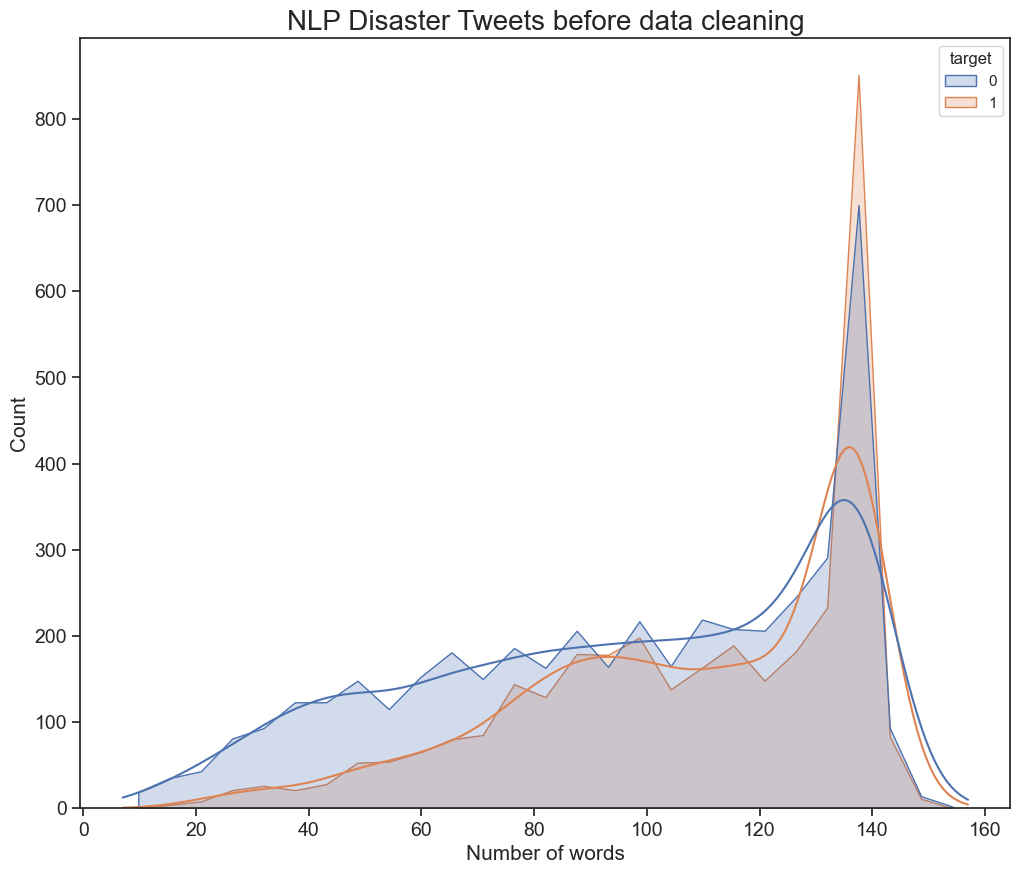

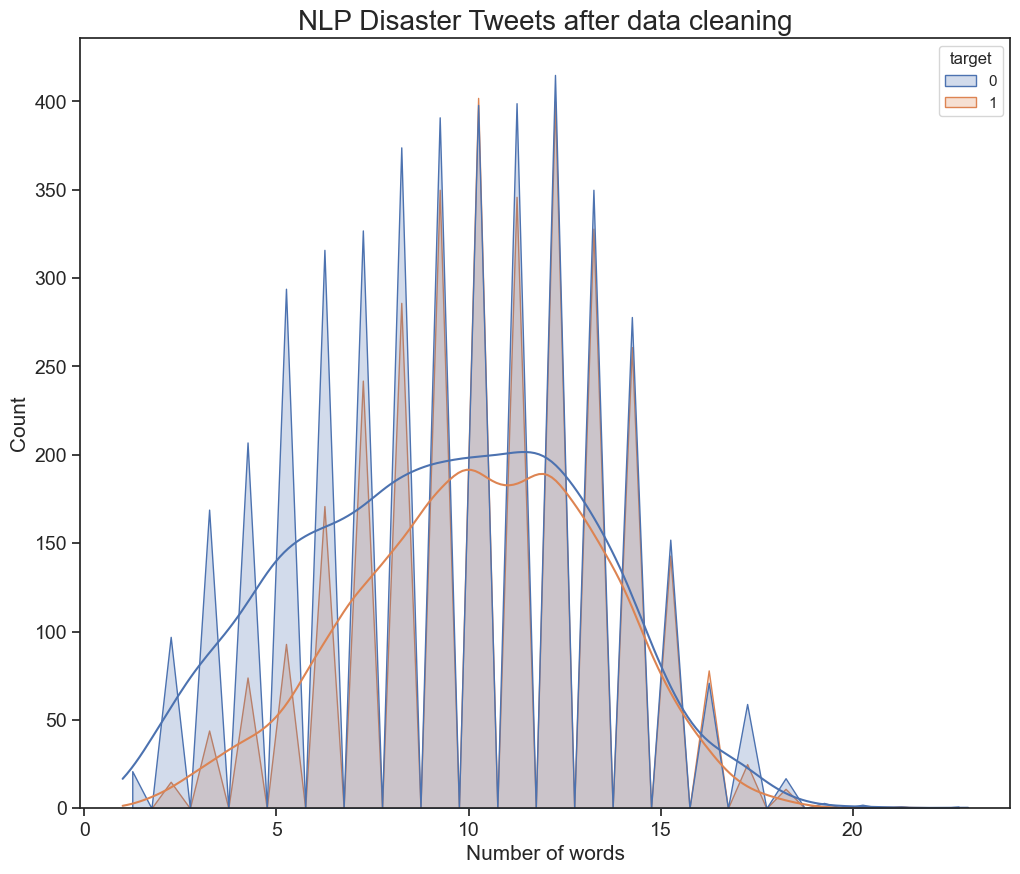

In [11]:
# using data cleaning to the train and test datasets
nlp_train['numwords']  = nlp_train["text"].apply(len)
nlp_test['numwords']  = nlp_test["text"].apply(len)
# Plot histogram of tweets length
def nlp_tweet(df, title, col, color):
    sns.set(rc={"figure.figsize":(12, 10)})
    sns.set_style("ticks")
    plot = sns.histplot(data = df,x = col,kde = True,hue = 'target',element="poly",color='purple')
    plot.set_xlabel('Number of words', fontsize = 15)
    plot.set_ylabel('Count', fontsize = 15)
    plot.set_title(title, fontsize = 20)
    plt.tick_params(labelsize = 14)
    plt.show()
 # find the number of words before data cleaning   
nlp_tweet(nlp_train, "NLP Disaster Tweets before data cleaning", 'numwords', 'tab10')
nlp_train["cleaned_text"] = nlp_train["text"].apply(data_cleaning)
nlp_test["cleaned_text"] = nlp_test["text"].apply(data_cleaning)
# find the number of words after data cleaning
nlp_train["cleaned_words"] = nlp_train["cleaned_text"].apply(lambda x: len(re.sub(r"[\W_]", " ", x).split()))
nlp_tweet(nlp_train, "NLP Disaster Tweets after data cleaning", 'cleaned_words', 'tab10')


## DModel Architecture (25 pts)

## Training ,Modeling and Prediction:


### Create two model architecture to find prediction better models:
Using LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit) models.The key difference between GRU and LSTM is that GRU's bag has two gates that are reset and update while LSTM has three gates that are input, output, forget. GRU is less complex than LSTM because it has less number of gates. If the dataset is small then GRU is preferred otherwise LSTM for the larger dataset.
LSTM facilitated us to give a sentence as an input for prediction rather than just one word, which is much more convenient in NLP and makes it more efficient. GRU uses less memory and is faster than LSTM, however, LSTM is more accurate when using datasets with longer sequences.

In [12]:
#Creating raw text for NLP processing dataset
max_f =3000
token=Tokenizer(num_words=max_f,split=' ')
token.fit_on_texts(nlp_train['cleaned_text'].values)
X = token.texts_to_sequences(nlp_train['cleaned_text'].values)
X = pad_sequences(X)
y = nlp_train['target']

## 1. LSTM Model architecture
 Building the LSTM model using the ‘Keras’ library. This step involves model initialization, adding required LSTM layers, and model compilation

In [13]:
#citation:https://www.analyticsvidhya.com/blog/2021/06/natural-language-processing-sentiment-analysis-using-lstm
model_lstm = Sequential()
model_opt = Adam(learning_rate = 0.0001)
model_lstm.add(Embedding(max_f, 32,input_length = X.shape[1]))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(32, dropout=0.2, recurrent_dropout=0.4))
model_lstm.add(Dense(1,activation='sigmoid'))
startTime = time.time()
model_lstm.compile(loss = 'binary_crossentropy', optimizer=model_opt ,metrics = ['accuracy'])
print(model_lstm.summary())


Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 19, 32)            96000     
                                                                 
 dropout (Dropout)           (None, 19, 32)            0         
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 104,353
Trainable params: 104,353
Non-trainable params: 0
_________________________________________________________________
None


### Splitting data into training and testing

In [14]:
#Train and test split dataset

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =41)

### Training model using training dataset:

In [15]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=2, cooldown=0),
              EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=2)]

lstm_history = model_lstm.fit(X_train, y_train, epochs = 5, batch_size=32, validation_data=(X_test, y_test), 
                          callbacks= [callbacks])
endTime = time.time()

Epoch 1/5


2023-04-17 20:23:37.545831: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


191/191 [==============================] - 135s 701ms/step - loss: 0.6843 - accuracy: 0.5657 - val_loss: 0.6760 - val_accuracy: 0.5693 - lr: 1.0000e-04
Epoch 2/5
191/191 [==============================] - 133s 698ms/step - loss: 0.6694 - accuracy: 0.5706 - val_loss: 0.6630 - val_accuracy: 0.5712 - lr: 1.0000e-04
Epoch 3/5
191/191 [==============================] - 134s 699ms/step - loss: 0.6529 - accuracy: 0.5877 - val_loss: 0.6437 - val_accuracy: 0.6356 - lr: 1.0000e-04
Epoch 4/5
191/191 [==============================] - 133s 698ms/step - loss: 0.6254 - accuracy: 0.6580 - val_loss: 0.6102 - val_accuracy: 0.7045 - lr: 1.0000e-04
Epoch 5/5
191/191 [==============================] - 133s 698ms/step - loss: 0.5777 - accuracy: 0.7287 - val_loss: 0.5572 - val_accuracy: 0.7466 - lr: 1.0000e-04


1. LSTMs take longer to train
2. LSTMs require more memory to train
3. LSTMs are easy to overfit
4. Dropout is much harder to implement in LSTMs
5. LSTMs are sensitive to different random weight initializations

## 2. GRU Model architecture:

GRU unit does not have to use a memory unit to control the flow of information like the LSTM unit. 
It can directly makes use of the all hidden states without any control. GRUs have fewer parameters and thus may 
train a bit faster or need less data to generalize. But, with large data, the LSTMs with higher expressiveness 
may lead to better results.

They are almost similar to LSTMs except that they have two gates: reset gate and update gate. 
Reset gate determines how to combine new input to previous memory and update gate determines how much of the 
previous state to keep. Update gate in GRU is what input gate and forget gate were in LSTM. 
We don't have the second non linearity in GRU before calculating the outpu, neither they have the output gate.

In [16]:
#citation:https://www.kaggle.com/code/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru
model_opt = Adam(learning_rate = 0.0001)
model_gru = Sequential()
model_gru.add(Embedding(max_f, 32,input_length = X.shape[1]))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(128))
model_gru.add(Dense(20, activation='ReLU'))
model_gru.add(Dense(1, activation='sigmoid'))
startTime = time.time()
model_gru.compile(loss = 'binary_crossentropy', optimizer=model_opt ,metrics = ['accuracy'])
print(model_gru.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 19, 32)            96000     
                                                                 
 dropout_1 (Dropout)         (None, 19, 32)            0         
                                                                 
 gru (GRU)                   (None, 128)               62208     
                                                                 
 dense_1 (Dense)             (None, 20)                2580      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 160,809
Trainable params: 160,809
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
gru_history = model_gru.fit(X_train, 
                            y_train, 
                            epochs = 10, 
                            batch_size=32, 
                            validation_data=(X_test, y_test), 
                            callbacks= [callbacks])
endTime = time.time()

Epoch 1/10
191/191 [==============================] - 4s 18ms/step - loss: 0.6835 - accuracy: 0.5675 - val_loss: 0.6693 - val_accuracy: 0.5693 - lr: 1.0000e-04
Epoch 2/10
191/191 [==============================] - 3s 14ms/step - loss: 0.6379 - accuracy: 0.6376 - val_loss: 0.5936 - val_accuracy: 0.7446 - lr: 1.0000e-04
Epoch 3/10
191/191 [==============================] - 3s 14ms/step - loss: 0.5368 - accuracy: 0.7619 - val_loss: 0.5127 - val_accuracy: 0.7669 - lr: 1.0000e-04
Epoch 4/10
191/191 [==============================] - 3s 14ms/step - loss: 0.4885 - accuracy: 0.7805 - val_loss: 0.5075 - val_accuracy: 0.7695 - lr: 1.0000e-04
Epoch 5/10
191/191 [==============================] - 3s 14ms/step - loss: 0.4870 - accuracy: 0.7708 - val_loss: 0.4919 - val_accuracy: 0.7814 - lr: 1.0000e-04
Epoch 6/10
191/191 [==============================] - 3s 14ms/step - loss: 0.4505 - accuracy: 0.7975 - val_loss: 0.4668 - val_accuracy: 0.7892 - lr: 1.0000e-04
Epoch 7/10
191/191 [====================

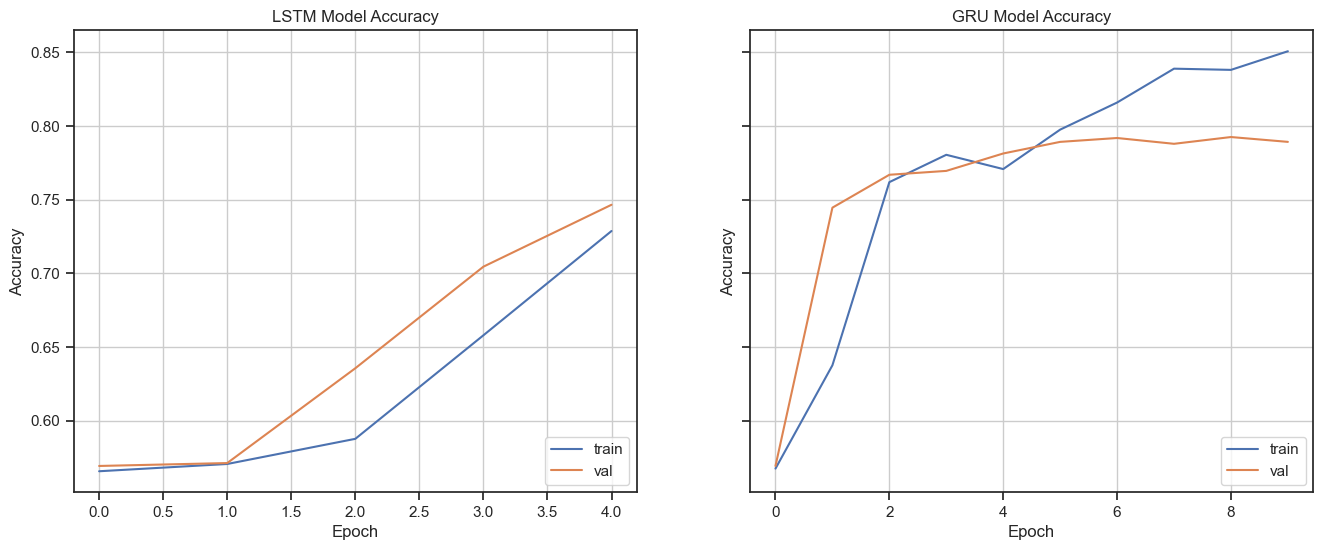

In [18]:
#citation:https://www.kaggle.com/code/tobikaggle/keras-mnist-cnn-learning-curve
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
axs[0].plot(lstm_history.history['accuracy'], label='train')
axs[0].plot(lstm_history.history['val_accuracy'], label = 'val')
axs[0].set_title('LSTM Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='lower right')

axs[1].plot(gru_history.history['accuracy'], label='train')
axs[1].plot(gru_history.history['val_accuracy'], label = 'val')
axs[1].set_title('GRU Model Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend(loc='lower right')

axs[0].grid()
axs[1].grid()

Looks like GRU model has higher accuracy than LSTM model.
Lets tune GRU model batch size and epochs for further prediction accuracy of models.

## Hyperparameter tuning and prediction:

In [19]:
lstm_gru = model_gru.fit(X_train, 
                      y_train, 
                      epochs = 15, 
                      batch_size=45, 
                      validation_data=(X_test, y_test), 
                      callbacks= [callbacks])

Epoch 1/15
136/136 [==============================] - 3s 20ms/step - loss: 0.3490 - accuracy: 0.8498 - val_loss: 0.4689 - val_accuracy: 0.7899 - lr: 1.0000e-05
Epoch 2/15
136/136 [==============================] - 2s 15ms/step - loss: 0.3453 - accuracy: 0.8552 - val_loss: 0.4696 - val_accuracy: 0.7899 - lr: 1.0000e-05
Epoch 3/15
136/136 [==============================] - 2s 15ms/step - loss: 0.3442 - accuracy: 0.8560 - val_loss: 0.4728 - val_accuracy: 0.7886 - lr: 1.0000e-05


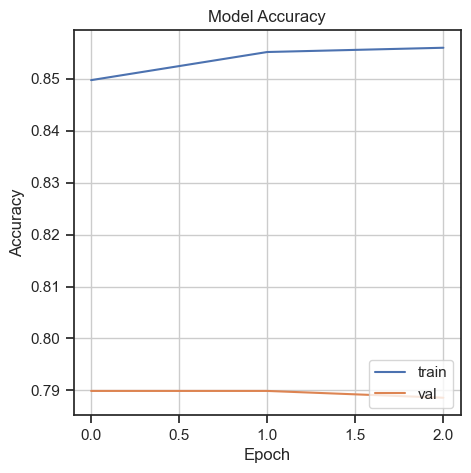

In [20]:
plt.figure(figsize=(5, 5))
plt.grid()
plt.plot(lstm_gru.history['accuracy'], label='train')
plt.plot(lstm_gru.history['val_accuracy'], label = 'val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [23]:
#Make test set predictions
max_f =4500
token=Tokenizer(num_words=max_f,split=' ')
token.fit_on_texts(nlp_train['cleaned_text'].values)
X = token.texts_to_sequences(nlp_train['cleaned_text'].values)
X = pad_sequences(X,maxlen=50)
token.fit_on_texts(nlp_test['cleaned_text'].values)
token_test = token.texts_to_sequences(nlp_test['cleaned_text'].values)
token_test = pad_sequences(token_test, maxlen = 50)
#Model dataset
lstm_o = 100
pred_model = Sequential()
pred_model.add(Embedding(max_f, 100, input_length = X.shape[1]))
pred_model.add(Dropout(0.2))
pred_model.add(GRU(128))
pred_model.add(Dense(20, activation='ReLU'))
pred_model.add(Dense(1,activation='sigmoid'))
model_opt = Adam(learning_rate = 2e-3)
startTime = time.time()
pred_model.compile(loss = 'binary_crossentropy', optimizer=model_opt ,metrics = ['accuracy'])
print(pred_model.summary())
final_model = pred_model.fit(X,y, epochs = 15,validation_split = 0.2 ,callbacks=[callbacks], batch_size=45)
# generate the submission file
y_hat = pred_model.predict(token_test).round()
submission_nlp['target'] = np.round(y_hat).astype('int')
submission_nlp.to_csv('./nlptweet.csv', index=False)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 100)           450000    
                                                                 
 dropout_4 (Dropout)         (None, 50, 100)           0         
                                                                 
 gru_3 (GRU)                 (None, 128)               88320     
                                                                 
 dense_7 (Dense)             (None, 20)                2580      
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 540,921
Trainable params: 540,921
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
136/136 [=======================

## CONCLUSION:


There are many ways to fine tune the model, we can keep changing the architecture of the model to see if 
it can get a better result, but it is really time consuming.Traiuning and predicting LSTM model is pretty tough job.
It has overfitting problem and had to use more data to generalized the better model and fine tuning the dropout parameter to achieve better regularization to the network.Its better to predict GRU model architecture with fast epoch timings.Further improvement can be done using more epochs and batch size modifications in GRU model.
Kaggle score = 0.5956.

### GITHUB REPOSITORY URL

https://github.com/kavishant87/Week4_NLP_Tweet_Disaster